# Task 1 DL | MSIB 6 - Celerates
---
Having health insurance makes us not have to worry too much about medical costs because the insurance company will cover it. For that, it is important to know and understand the right insurance product but actually it is necessary to understand in advance what factors affect the purchase of health insurance can be expensive and buyers can make a reference as the cost of purchasing health insurance in the future.

*by ~ムアマル ヤシール* | credits @2024 All Right Reserved

## Data Understanding

Many factors affect how much health insurance costs to pay. It is good to have an understanding of these factors. Here are some factors that affect how much health insurance premiums cost:(variabel “charges” on dataset)

`Dataset Description` :
- Age : Age of the insured
- Sex : Gender
- BMI : Body Mass Index
- Children : Number of children
- Smoker : Indicator if you smoke
- Region : Region where the insured lives
- Charges : Secure prime

### Exploratory Data Analysis (EDA)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd #dataframe
import numpy as np #komputasi numerik

In [ ]:
## Machine Learning
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures #preprocessing data
#membagi data
from sklearn.model_selection import train_test_split
#load model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
#metrics
from sklearn import metrics

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Deep Learning/Asynchronous Task/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

There are 1338 rows of data or the number of data samples and there are 7 columns or features in the current dataset.

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Some results are obtained in the form of:
* The number of samples 1338.
* The average age is 39, has a bmi of 30, number of children 1 and 13270 fees to be paid.
* The oldest is 64 years old and the youngest is 18 years old, etc

**Dataset Info**

Using the `info()` function to get information in the form of data types and check for null data.

If seen, there is no null data and there are several object data types (strings) in this case in the sex, smoker and region features.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking what regions are contained in the dataset by using the `unique()` function. If seen, there are 4 regions.

In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)


Ensure that no data is null with `isnull().sum()` function

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Visualization Data**

<Axes: xlabel='age'>

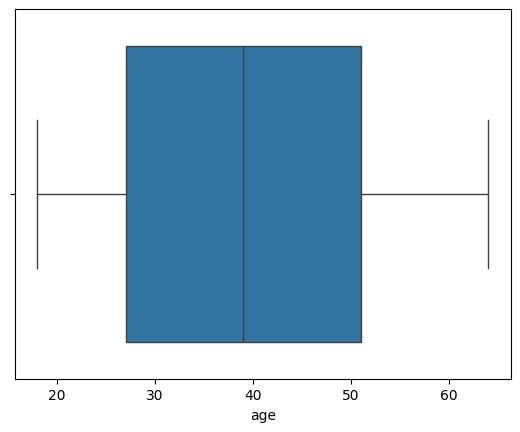

In [ ]:
sns.boxplot(x = data['age'])

If looking at the `age` boxplot visualization, the youngest age is 18 years old, the average is 39 years old and the oldest is 64 years old.

<Axes: xlabel='bmi'>

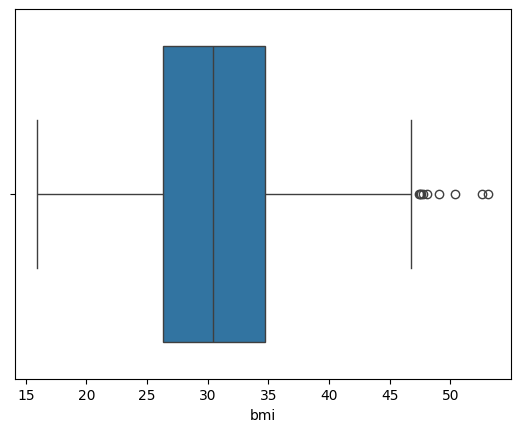

In [ ]:
sns.boxplot(x = data['bmi'])

For bmi, it can be seen that there are some outlier data and the lowest bmi is 15, the average bmi is 30 and the highest bmi is 53.

<Axes: xlabel='children'>

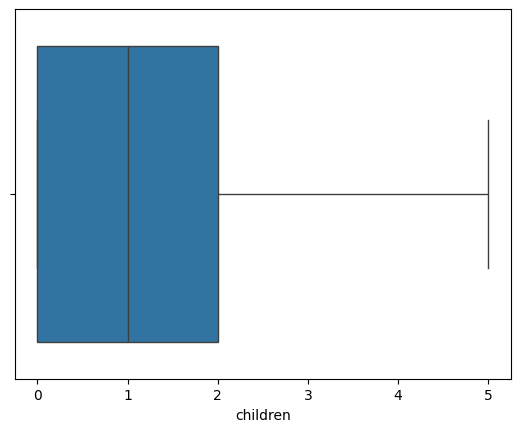

In [ ]:
sns.boxplot(x = data['children'])

If we look at the visualization of the child feature. The average number of children is 1 and the most is 5 but most have no children.

### Unvariate Analysis

**Categorical Data**

sex
male      676
female    662
Name: count, dtype: int64


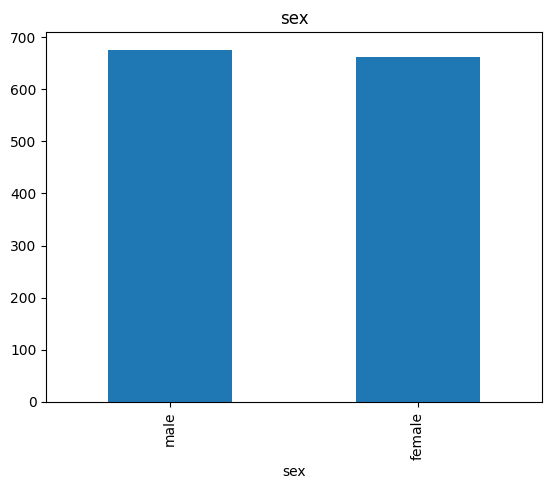

In [ ]:
print(data['sex'].value_counts())
data['sex'].value_counts().plot(kind='bar', title='sex');

smoker
no     1064
yes     274
Name: count, dtype: int64


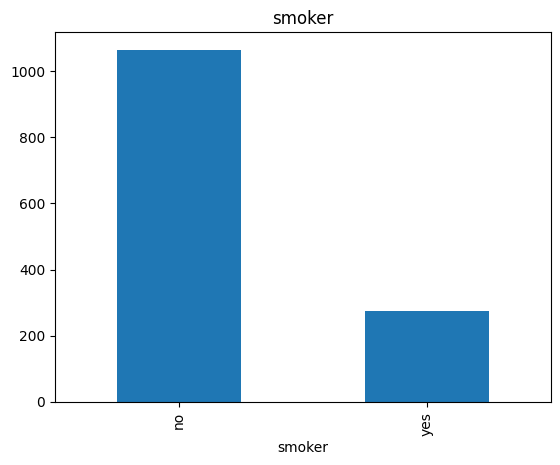

In [ ]:
print(data['smoker'].value_counts())
data['smoker'].value_counts().plot(kind='bar', title='smoker');

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


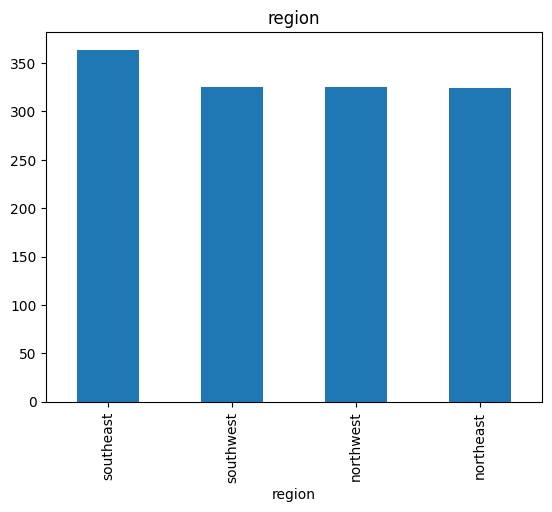

In [ ]:
print(data['region'].value_counts())
data['region'].value_counts().plot(kind='bar', title='region');

**Numeric Data**

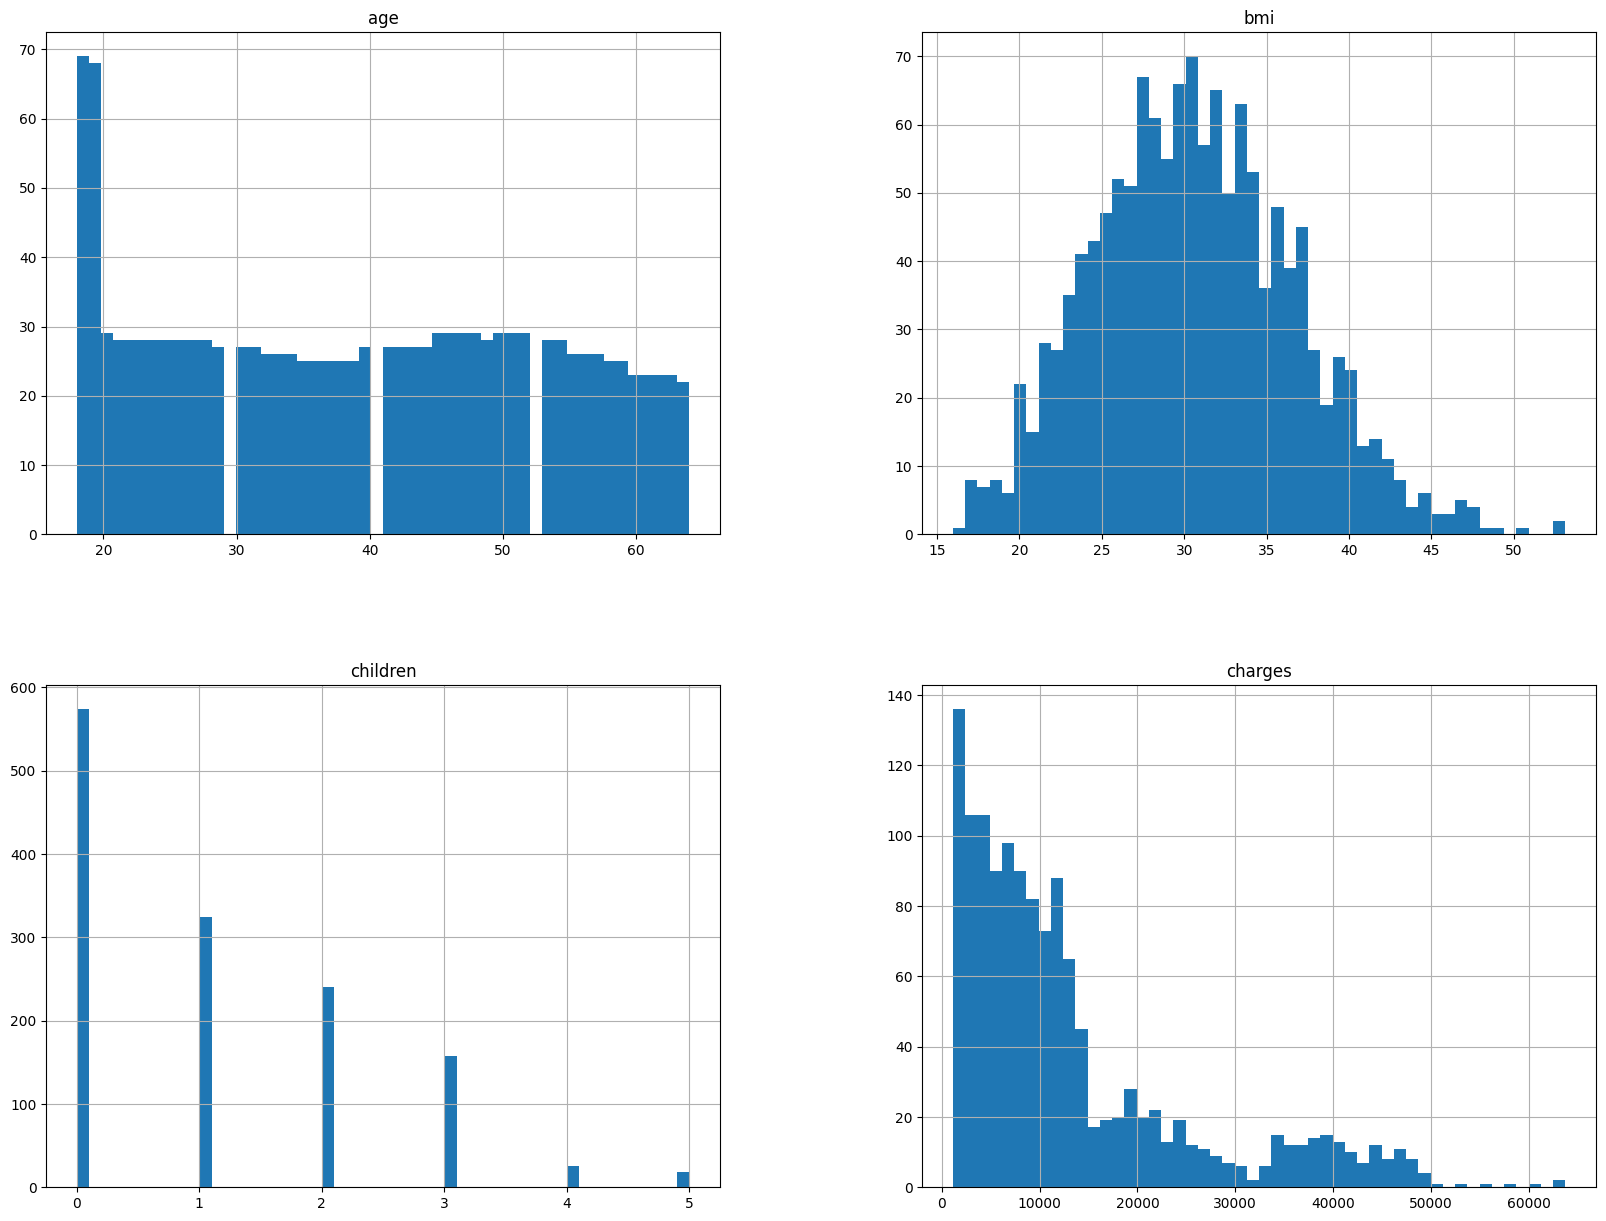

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

If you look at the `charges` feature or rather the labels or targets, the data is right-skewed.

### Multivariate Analysis

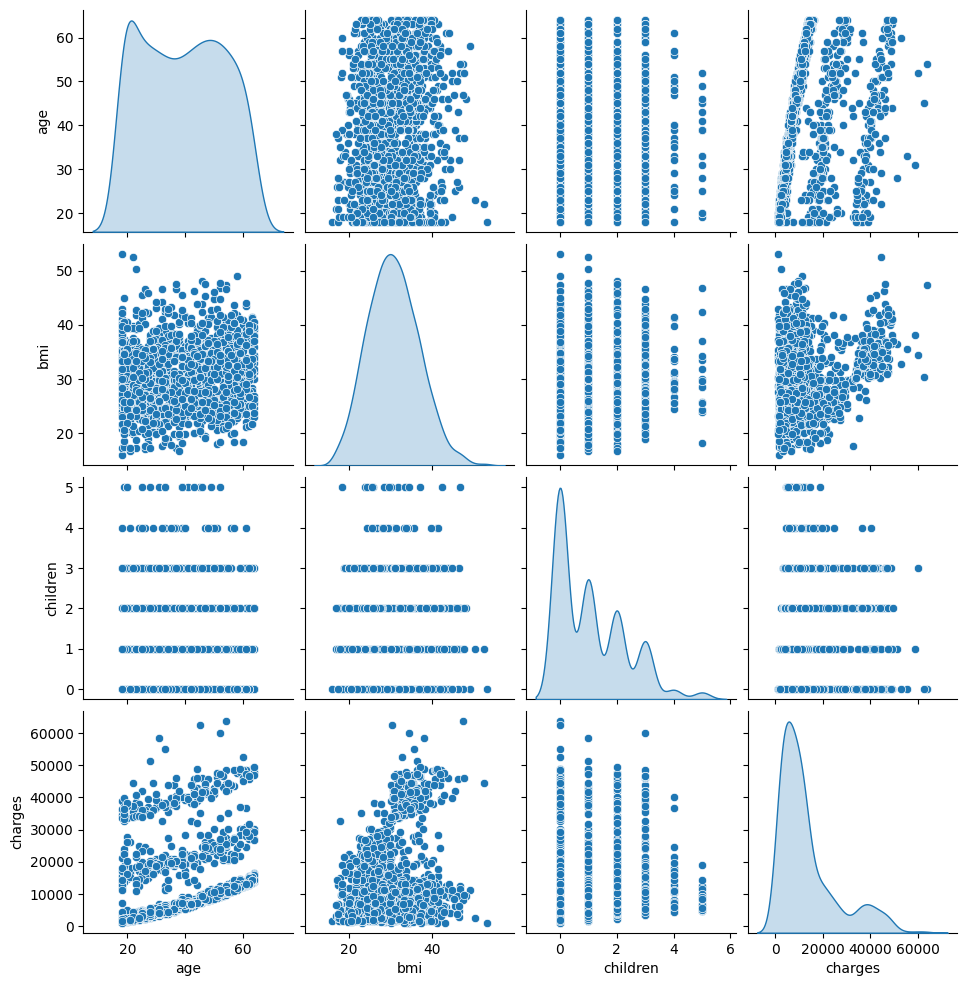

In [ ]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

It can be noticed that the features contained in the dataset used against the target `charges` do not have a linear relationship.

Visualization of the `object` data type against the target.

<ipython-input-6-91a0c0b39886>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = "charges", kind = "bar", dodge = False, height = 4, aspect = 3,  data=data, palette="Set3")
<ipython-input-6-91a0c0b39886>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = "charges", kind = "bar", dodge = False, height = 4, aspect = 3,  data=data, palette="Set3")
<ipython-input-6-91a0c0b39886>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = "charges", kind = "bar", dodge = False, height = 4, aspect = 3,  data=data, palette=

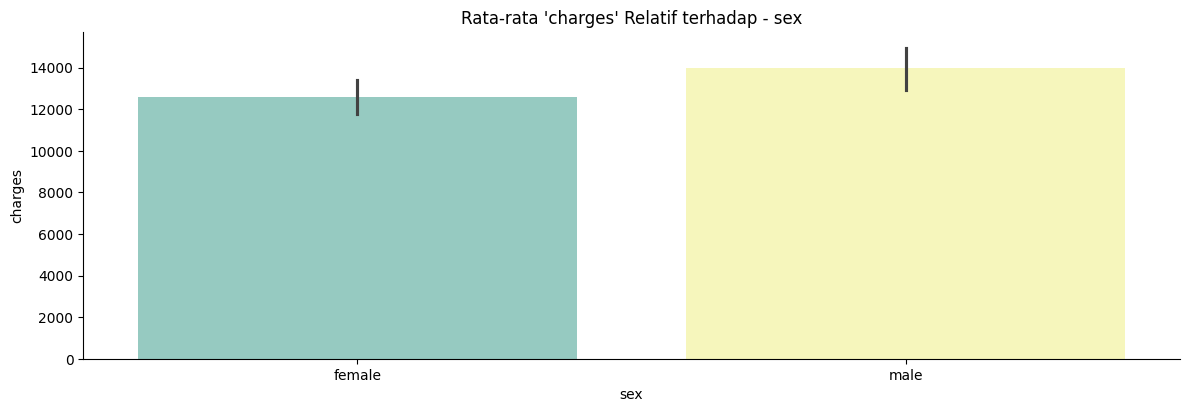

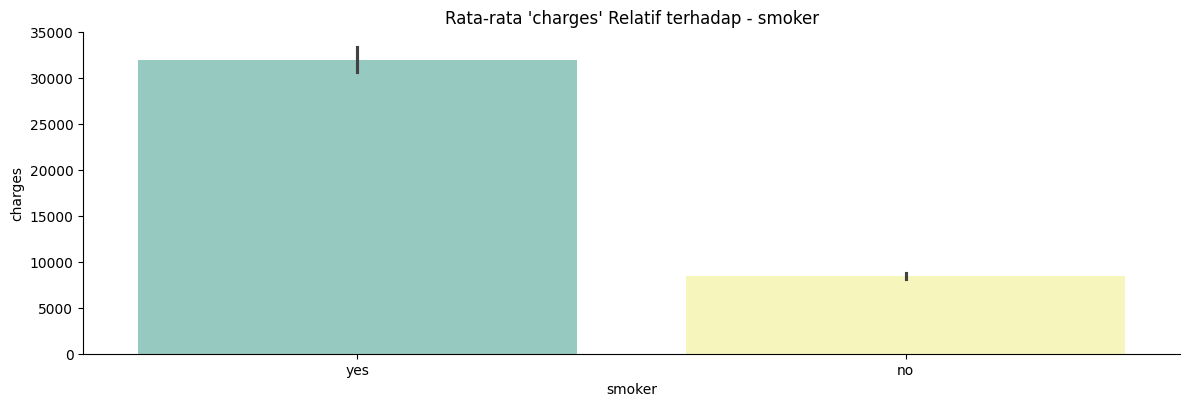

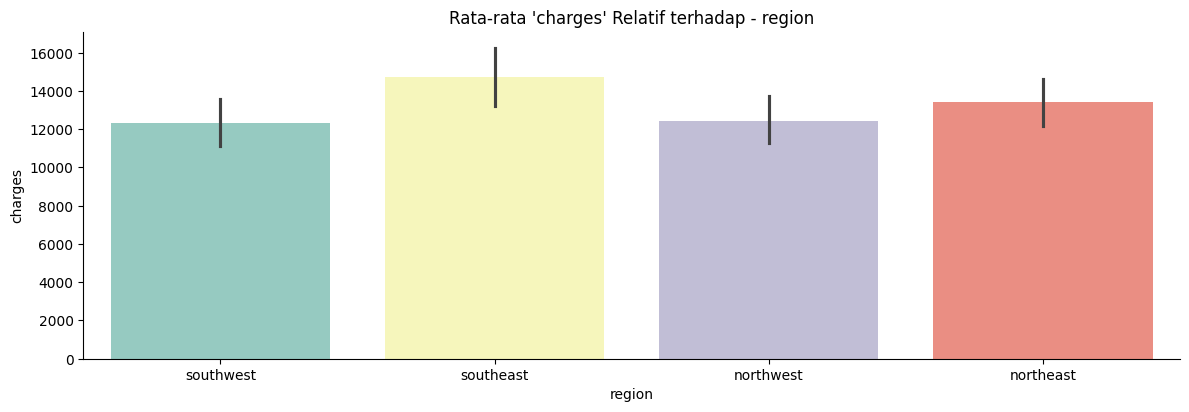

In [ ]:
cat_features = data.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x = col, y = "charges", kind = "bar", dodge = False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

Analysis results:
* The factor on the sex feature does not have much effect.
* Smoker factor affects the cost.
* Southeast region with high paid charges.

Considering certain factors (sex, smoker, children) let's see how it changes by region.

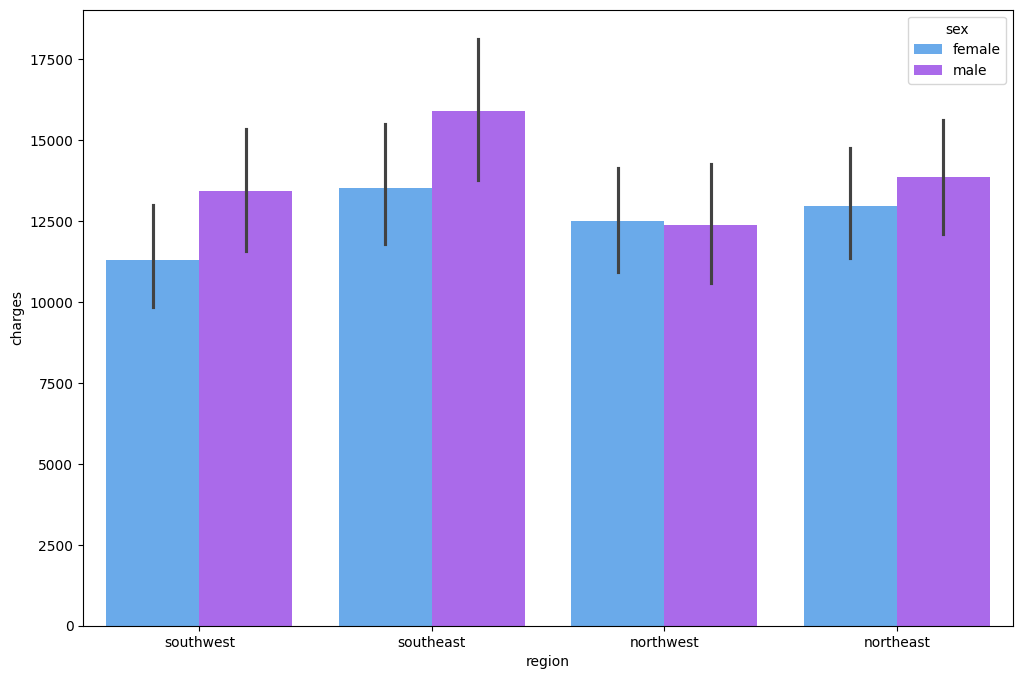

In [ ]:
f, ax = plt.subplots(1, 1, figsize =(12, 8))
ax = sns.barplot(x ='region', y ='charges', hue ='sex', data = data, palette ='cool')

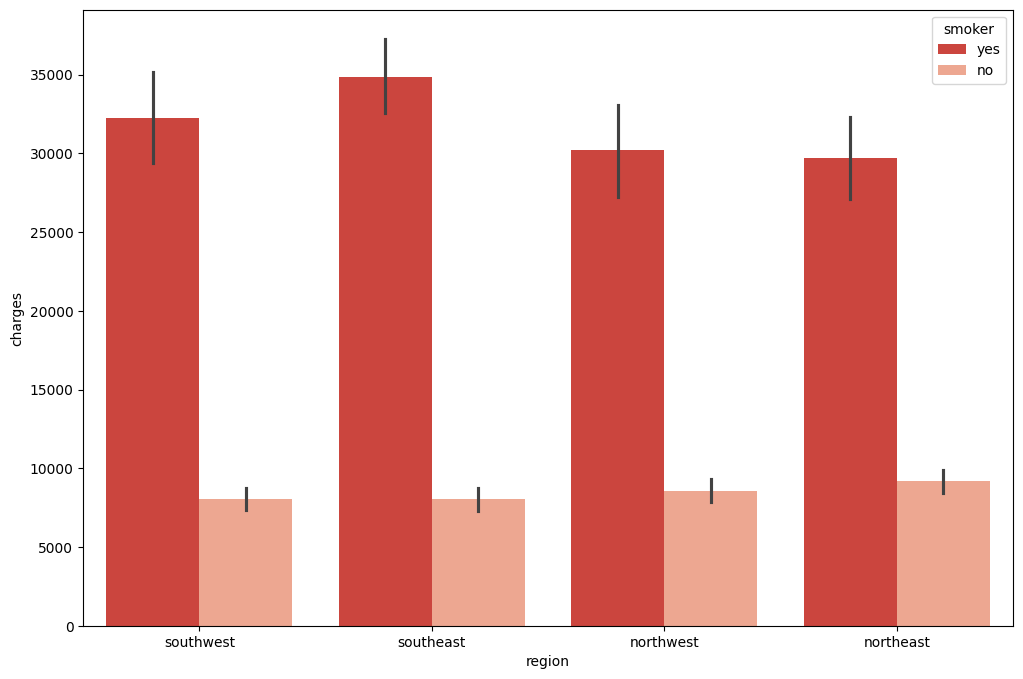

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue ='smoker', data = data, palette ='Reds_r')

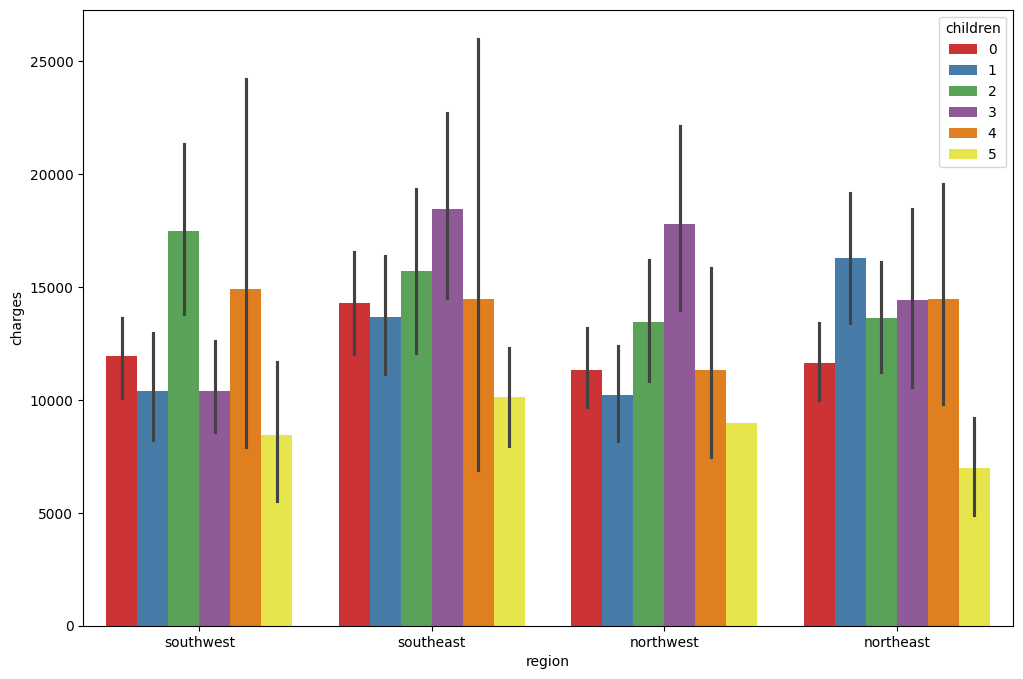

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data = data, palette='Set1')

As can be seen from these barplots the highest `charges` due to smoking are still in the Southeast but the lowest in the Northeast. People in the Southwest generally smoke more than people in the Northeast but people in the Northeast have higher `charges` by sex than in the Southwest and Northwest overall and people with children tend to have higher overall medical `charges` as well.

Now let's analyze medical costs by age, bmi and children by smoker factor.

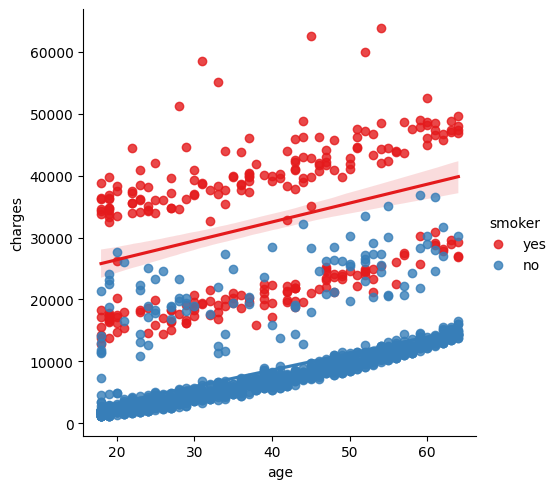

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='Set1')

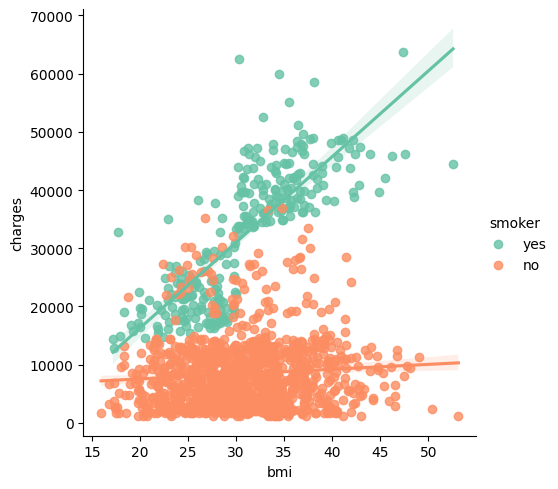

In [ ]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='Set2')

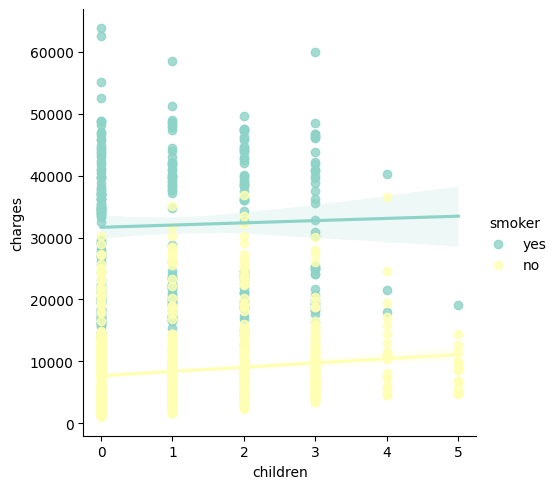

In [ ]:
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set3')

**Smoking has the highest impact** on medical costs, although the costs increase with age, bmi, and number of children.

## Data Preparation

In [ ]:
##konversi tipe data object ke categorical
data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

### One Hot Encoding

Next, perform one hot encoding using `one hot encoding`.
One hot encoding converts each value in a column into a new column with a value of 0 or 1.

In [ ]:
#preprocessing
#Convert kolom
#Karena pada kolom sex,smoker dan region berupa variabel text/categorial maka harus dilakukan kategorisasi atau encode

#kolom smoker
data = pd.concat([data, pd.get_dummies(data['smoker'], prefix='smoker')],axis=1)
#kolom sex
data = pd.concat([data, pd.get_dummies(data['sex'], prefix='sex')],axis=1)
#kolom region
data = pd.concat([data, pd.get_dummies(data['region'], prefix='region')],axis=1)
data.drop(['smoker','sex','region'], axis=1, inplace=True)

data.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
smoker_no              bool
smoker_yes             bool
sex_female             bool
sex_male               bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [ ]:
data.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,True,False,False,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,False,True,False,True,False,False


**Correlation Matrix**

Using the function provided by Seaborn to see the correlation between variables or features. More precisely, it checks the correlation between features and labels or targets.

Text(0.5, 1.0, 'Correlation Matrix')

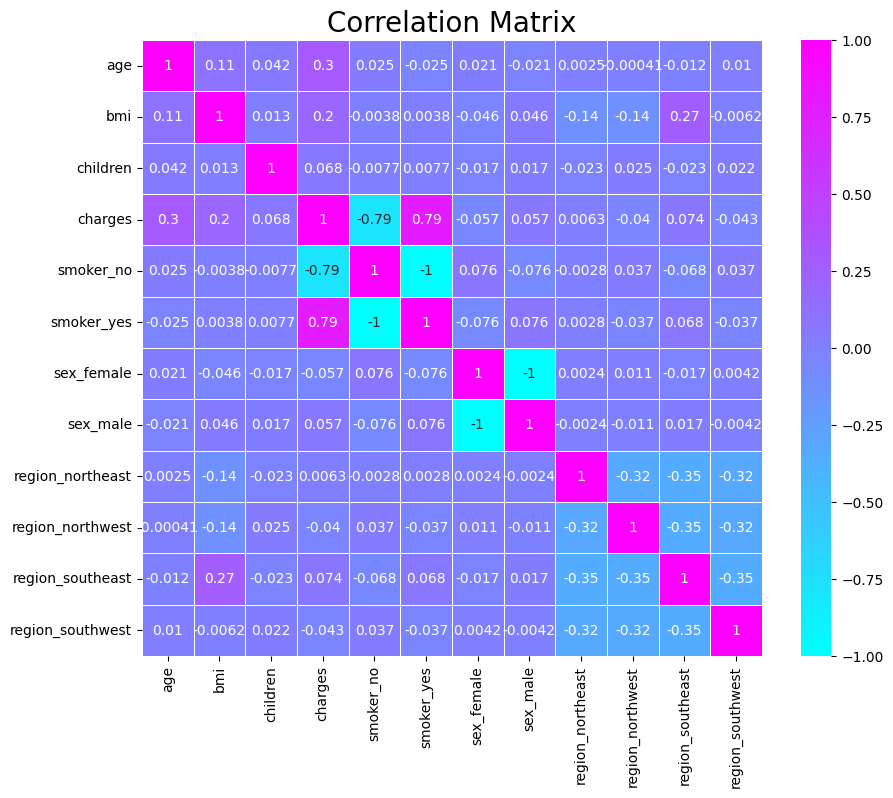

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=data.corr(), annot=True, cmap='cool', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

### Train-Test (Split Data)

Dividing the dataset into train and test data is something that must be done before building a model. Retain some of the existing data to test how well the model generalizes to the new data.

In [ ]:
X = data.drop(['charges'], axis=1)
y = data['charges']

Split the dataset with 80:20. So 80% for training data and 20% test data with `random_state = 0` so that the shared data is not randomized.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 11) (268, 11) (1070,) (268,)


Need to scale the required columns. Differences in scale can cause problems with the `euclidean distance` estimator.

StandardScaler removes the mean (centered at 0) and scales to the variance (standard deviation = 1), assuming normally distributed (gauss) data for all features.

In [ ]:
# Feature scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Modelling with Machine Learning
---

**Evaluation Model Function**

A model evaluation function was created to produce output in the form of MSE, RMSE, and R2 metrics. This model evaluation function will be used to evaluate several models that will be used.

The output generated in the model evaluation function is in the form of metrics from the training and validation results of the model.

In [ ]:
def evaluate_model(model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,print_metric=True):
  y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)
  rmse_train, rmse_test = np.sqrt(mse_train), np.sqrt(mse_test)
  r2_train, r2_test = r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)
  if print_metric:
        print(f'''On training set:\nMSE: {mse_train}    RMSE: {rmse_train}    r2: {r2_train}\n
=============\nOn test set:\nMSE: {mse_test}    RMSE: {rmse_test}    r2: {r2_test}''')
  return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test

## Random Forest

Apply the concept of fine tuning to find the best fit parameters for the model. The parameters to look for are `n_estimators` and `max_leaf_nodes`.

In [ ]:
n_estimators = [10, 30, 100, 300, 1000, 3000]
max_leaf_nodes = [10, 30, 50, 75, 100]
results = []
for est in n_estimators:
    for n_nodes in max_leaf_nodes:
        for_reg = RandomForestRegressor(n_estimators=est, max_leaf_nodes=n_nodes, random_state=0)
        for_reg.fit(X_train, y_train)
        mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(for_reg,print_metric=False)
        results.append([est, n_nodes, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test])
for_results_data = pd.DataFrame(results, columns=['n_estimators', 'n_nodes', 'mse_train', 'rmse_train', 'r2_train', 'mse_test', 'rmse_test', 'r2_test'])
for_results_data

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
0,10,10,2.015109e+07,4488.996587,0.859443,1.782335e+07,4221.771537,0.887995
1,10,30,1.540936e+07,3925.476138,0.892517,1.697982e+07,4120.657115,0.893296
2,10,50,1.189238e+07,3448.533047,0.917049,1.843576e+07,4293.687847,0.884147
3,10,75,9.037475e+06,3006.239280,0.936962,1.893812e+07,4351.794485,0.880990
4,10,100,6.994195e+06,2644.653967,0.951214,2.001638e+07,4473.967006,0.874214
5,30,10,2.028045e+07,4503.381934,0.858541,1.819100e+07,4265.091328,0.885685
6,30,30,1.502875e+07,3876.692760,0.895172,1.735470e+07,4165.896885,0.890940
7,30,50,1.151963e+07,3394.057669,0.919649,1.785342e+07,4225.330345,0.887806
8,30,75,8.382044e+06,2895.176013,0.941534,1.838533e+07,4287.811484,0.884463
9,30,100,6.274216e+06,2504.838608,0.956236,1.940916e+07,4405.582694,0.878030


Find the minimum R2 value from the fine tuning results.

In [ ]:
min_rmse = min(for_results_data['rmse_test'])
for_results_data[for_results_data['rmse_test']==min_rmse]

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
1,10,30,1.540936e+07,3925.476138,0.892517,1.697982e+07,4120.657115,0.893296


Find the maximum value of R2 from the fine tuning results.

In [ ]:
max_r2 = max(for_results_data['r2_test'])
for_results_data[for_results_data['r2_test']==max_r2]

,n_estimators,n_nodes,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
1,10,30,1.540936e+07,3925.476138,0.892517,1.697982e+07,4120.657115,0.893296


Then the parameters that are suitable for the Random Forest model are:

`n_estimators = 3000` and `max_leaf_nodes = 10`.

In [ ]:
#memilih estimator 3000 and nodes 10
randomforest_model = RandomForestRegressor(n_estimators=3000, max_leaf_nodes=10, random_state=0)
randomforest_model.fit(X_train, y_train)
mse_train, rmse_train, r2_train, mse_test, rmse_test,
r2_test = evaluate_model(randomforest_model,print_metric=True)

On training set:
MSE: 20029775.580781113    RMSE: 4475.4637280153565    r2: 0.8602893673092727

On test set:
MSE: 17157171.627343927    RMSE: 4142.121633576678    r2: 0.8921813882377928


In [ ]:
results_data = pd.DataFrame([['Random Forest', *for_results_data[for_results_data['r2_test']==max_r2].iloc[:,5:].values[0]]], columns=['Model', 'MSE', 'RMSE', 'R^2'])
results_data

,Model,MSE,RMSE,R^2
0,Random Forest,1.697982e+07,4120.657115,0.893296


## Polynomial Regression

Apply the concept of fine tuning to find the best parameter fit for the model.

In [ ]:
degree = [2,3,4,5]
results = []
for d in degree:
    poly_feat = PolynomialFeatures(degree=d)
    X_poly = poly_feat.fit_transform(X)
    Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    poly_reg = LinearRegression()
    poly_reg.fit(Xp_train, yp_train)

    mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(poly_reg, Xp_train, yp_train, Xp_test, yp_test,print_metric=False)

    results.append([d, mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test])
poly_results = pd.DataFrame(results, columns=['degree', 'mse_train', 'rmse_train', 'r2_train', 'mse_test', 'rmse_test', 'r2_test'])
poly_results

,degree,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
0,2,5.299257e+07,7279.599847,0.630369,4.388588e+07,6624.642034,0.724214
1,3,2.418883e+07,4918.214557,0.831279,2.459227e+07,4959.058977,0.845458
2,4,1.905753e+07,4365.493252,0.867071,2.386682e+07,4885.368370,0.850017
3,5,1.376964e+07,3710.745896,0.903955,9.815951e+07,9907.547971,0.383149


Judging from the fine tuning results, the `degree` to be used is `degree 3` because higher degrees cause overfitting of the training set.

Modeling polynomial regression with degree 3.

In [ ]:
#memilih degree 3
polynomial_model = PolynomialFeatures(degree=3)
polynomial_model = LinearRegression()
polynomial_model.fit(Xp_train, yp_train)
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(polynomial_model, Xp_train, yp_train, Xp_test, yp_test,print_metric=True)

On training set:
MSE: 13769635.104683125    RMSE: 3710.7458960003078    r2: 0.9039547685076607

On test set:
MSE: 98159506.79557028    RMSE: 9907.547970894226    r2: 0.3831488089159054


In [ ]:
results_data = pd.DataFrame([['Random Forest', *for_results_data[for_results_data['r2_test']==max_r2].iloc[:,5:].values[0]]], columns=['Model', 'MSE', 'RMSE', 'R^2'])
result_model = pd.DataFrame([['Polynomial Regression', *poly_results[poly_results['degree']==2].iloc[:,4:].values[0]]], columns=['Model', 'MSE', 'RMSE', 'R^2'])

final_results = pd.concat([results_data, result_model], ignore_index=True)
print(final_results)

                   Model           MSE         RMSE       R^2
0          Random Forest  1.697982e+07  4120.657115  0.893296
1  Polynomial Regression  4.388588e+07  6624.642034  0.724214


It can be seen that the Random Forest model produces the highest R2 value and also produces low MSE and RMSE values.  

### Evaluation

The model used is regression, so for the metrics used to evaluate the model, namely:

* Root Mean Squared Error (RMSE)
* R2

**Root Mean Squared Error (RMSE)**

Root Mean Squared Error (RMSE) is one way to evaluate regression models by measuring the accuracy of a model's forecast results. RMSE is calculated by squaring the error (prediction - observation) divided by the amount of data (= average), then rooted.

A low RMSE value indicates that the variation in values produced by a forecast model is close to the variation in observed values. RMSE calculates how different a set of values are. The smaller the RMSE value, the closer the predicted and observed values are.

The advantage of RMSE is that it has a fairly high level of sensitivity. On the other hand, RMSE does not describe the average error alone but has other implications that are more difficult to parse and understand.


<img src="https://programmerah.com/wp-content/uploads/2020/11/20190714113817886.png" width="200">

Where,
* n = number of datasets
* yi = true value
* ŷi = predicted value

To implement it into the code it can be:
1. Create a function to calculate mse
2. Use the root function from the numpy library and use the result of calculating mse `np.sqrt(mse)`. In simple terms, the rmse formula is just the addition of the root of the mse formula.

**R Squared (R2)**

R squared is a number that ranges from 0 to 1 which indicates the magnitude of the combination of independent variables together affecting the value of the dependent variable. The closer to one, the better the model released by the regression.

If we look at the R squared formula below, it is strongly influenced by the predicted Y value or the Y value from the formula results with the actual Y value. The reality that often arises is that the R squared value will get better (the value will continue to approach the value of 1) if we add variables. The greater the number of variables that determine the predicted Y value, the greater the SSR value, which results in a larger R squared value.

The nature of R-squared which will get better if we add more variables is the weakness of R squared itself. The more independent variables used, the more “noise” in the model and this cannot be explained by R squared.

<img src="https://miro.medium.com/max/2812/1*_HbrAW-tMRBli6ASD5Bttw.png" width="200">

Where,
* SSRes: The square of the difference between the predicted Y value and the average value Y = ∑ (Ypred - Yrata)²
* SSTotal: The square of the difference between the actual Y value and the average value Y = ∑ (Yactual - Yaverage)²

To apply it to the code, you can use it directly from the sklearn library to get the R2 value by:
* Load library `from sklearn.metrics import r2_score`.
* Determine the Y value (actual value) and Y' value (predicted value).
* Call the function `r2_score(Y_true,Y_pred)` which accepts the input parameters Y_true as the true value and Y_pred as the predicted value.

#### Matrix R^2

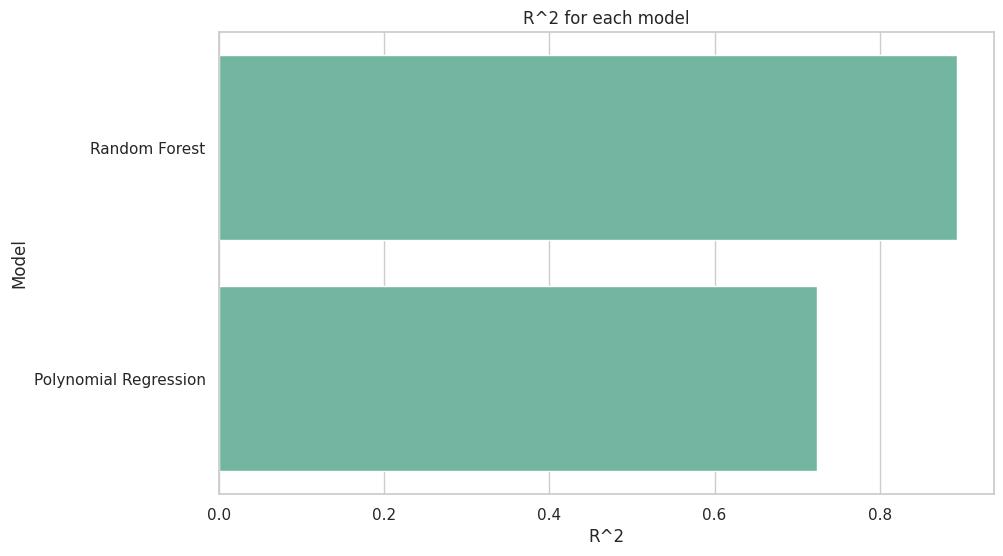

In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.set_palette('Set2')
sns.set_style("whitegrid")
sns.barplot(x='R^2', y='Model', data = final_results)
plt.title('R^2 for each model')
plt.show()

#### RMSE

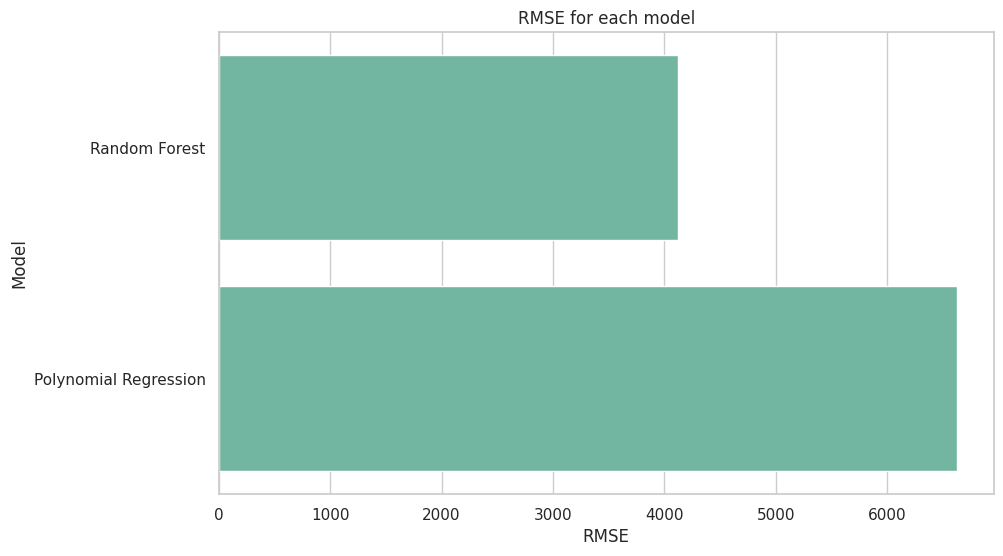

In [ ]:
sns.barplot(x='RMSE', y='Model', data = final_results)
plt.title('RMSE for each model')
plt.show()

### Validation

Feature importance ranking


1.smoker_no(0.356737)
2.smoker_yes(0.260869)
3.bmi(0.208093)
4.age(0.133713)
5.children(0.018740)
6.region_northwest(0.004852)
7.region_northeast(0.004646)
8.region_southeast(0.003621)
9.region_southwest(0.003035)
10.sex_male(0.002941)
11.sex_female(0.002752)


<BarContainer object of 11 artists>

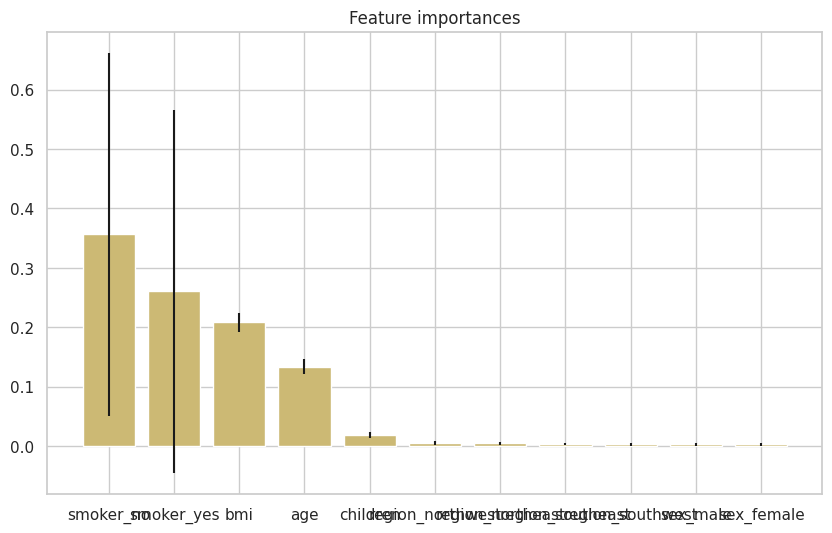

In [ ]:
print('Feature importance ranking\n\n')
importances = for_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in for_reg.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'bmi', 'children','smoker_no','smoker_yes','sex_female','sex_male','region_northeast','region_northwest','region_southeast','region_southwest']
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

The conclusion tells us that the features that affect the cost of insurance are `smoker, bmi and age`. Apart from the mentioned features, there is very little possibility of affecting the cost of insurance to be paid.

### Prediction Result

In [ ]:
#Predicting the charges
y_test_pred_poly = polynomial_model.predict(Xp_test)
y_test_pred_for = randomforest_model.predict(X_test)

#Comparing the actual output values with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted Polynomial': y_test_pred_poly,'Predicted Random Forest': y_test_pred_for})
data

,Actual,Predicted Polynomial,Predicted Random Forest
578,9724.53000,11298.763577,12521.366079
610,8547.69130,8126.982107,10883.798450
569,45702.02235,12378.938422,44379.348242
1034,12950.07120,9565.166467,14263.990393
198,9644.25250,-5525.750080,11314.516086
...,...,...,...
1084,15019.76005,10923.895939,15550.515121
726,6664.68595,7336.909876,6879.205600
1132,20709.02034,10242.755077,12482.242708
725,40932.42950,67814.549695,38809.909610


The results of the comparison of several models used, it is evident that the Random Forest model is closest to the actual value (actual value) so that the Random forest model can be said to be suitable for use.

# Modelling with Deep Learning
---

## Step Preparation

This command is useful for users who want to use SciKeras with TensorFlow, as it simplifies the installation process and ensures that all necessary dependencies are met.

In [1]:
pip install scikeras[tensorflow]

Import Library Needed

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Read Data

In [14]:
data = pd.read_csv('/content/drive/MyDrive/Deep Learning/Asynchronous Task/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   smoker_no         1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   sex_female        1338 non-null   bool   
 7   sex_male          1338 non-null   bool   
 8   region_northeast  1338 non-null   bool   
 9   region_northwest  1338 non-null   bool   
 10  region_southeast  1338 non-null   bool   
 11  region_southwest  1338 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 52.4 KB


## Data Preprocessing

The code is using the Pandas library in Python to manipulate a dataset.

`x = data.drop(['charges'], axis=1)`

This line of code is dropping the column named 'charges' from the dataset data and assigning the resulting dataset to X. The axis=1 parameter specifies that we want to drop a column (as opposed to a row, which would be axis=0). The resulting X will contain all the features (columns) of the original dataset except for the 'charges' column.

`y = data['charges']`

This line of code is selecting the 'charges' column from the dataset data and assigning it to y. This y will be the target variable, which is the column that we want to predict or analyze.

In [12]:
X = data.drop(['charges'], axis=1)  # Features
y = data['charges']  # Target variable

### One Hot Encoder

In [15]:
#preprocessing
#Convert kolom
#Karena pada kolom sex,smoker dan region berupa variabel text/categorial maka harus dilakukan kategorisasi atau encode

#kolom smoker
data = pd.concat([data, pd.get_dummies(data['smoker'], prefix='smoker')],axis=1)
#kolom sex
data = pd.concat([data, pd.get_dummies(data['sex'], prefix='sex')],axis=1)
#kolom region
data = pd.concat([data, pd.get_dummies(data['region'], prefix='region')],axis=1)
data.drop(['smoker','sex','region'], axis=1, inplace=True)

data.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
smoker_no              bool
smoker_yes             bool
sex_female             bool
sex_male               bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [21]:
data.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,True,False,False,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,False,True,False,True,False,False


### Normalization

In [19]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"]))


In [20]:
X = data.drop("charges", axis=1)
y = data["charges"]

### Scalarization

The syntax len(data) is used to get the number of elements in the data variable. It's a common operation in programming, especially when working with datasets or arrays.

In the context of the comment #this much data can handle 0.1 testsize, it seems that the author is indicating that the data variable contains a certain amount of data that can be handled by a model or algorithm with a test size of 0.1.

In [17]:
len(data) #this much data can handle 0.1 testsize

1338

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.1,
                                                    random_state=9)

In [22]:
# Feature scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Build Model (ANN Backprop)

The tf.keras.Sequential model below is a linear stack of layers. In this case, we are creating a neural network with `four dense layers, including an input layer, two hidden layers, and an output layer`.

- The first layer `tf.keras.layers.Dense(128)` creates a dense layer with 128 neurons. This layer has no activation function, so the raw weighted sum of the inputs is used as the output.
- Second layer `tf.keras.layers.Dense(32` creates a dense layer with 32 neurons. Again, there is no activation function.
- Third layer `tf.keras.layers.Dense(8)` creates a dense layer with 8 neurons. This layer uses a rectified linear unit (ReLU) activation function, which outputs the input directly if it is positive; otherwise, it outputs zero.
The fourth layer `tf.keras.layers.Dense(1)` creates a dense layer with 1 neuron. This layer uses a linear activation function, which outputs the input directly.

In [48]:
tf.random.set_seed(9)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = insurance_model.fit(X_train, y_train, epochs=100, validation_split=0.5,
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 13059.5137 - mae: 13059.5137 - val_loss: 13229.7051 - val_mae: 13229.7051
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 12872.8682 - mae: 12872.8682 - val_loss: 12911.8398 - val_mae: 12911.8398
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12476.7920 - mae: 12476.7920 - val_loss: 12174.4258 - val_mae: 12174.4258
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11573.1709 - mae: 11573.1709 - val_loss: 10643.7500 - val_mae: 10643.7500
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9840.5801 - mae: 9840.5801 - val_loss: 8523.0254 - val_mae: 8523.0254
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7863.1274 - mae: 7863.1274 - val_loss: 7607.4868 - val_mae: 7607.4868
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7254.9824 - mae: 7254.9824 - val_loss: 7587.9287 - val_mae: 7587.9287
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7227.1250 - mae: 7227

Overall, this syntax creates a neural network model using the backpropagation algorithm to learn the relationship between the input data and target data. The model is trained using the MAE loss function and the Adam optimizer, and the training process is monitored using the MAE evaluation metric.

### Model Evaluated

In the code below, `insurance_model_loss` and `insurance_model_mae` are two variables used to store the evaluation results of the insurance_model on the test dataset.

`insurance_model.evaluate()` is a method provided by Keras, a popular deep learning library in Python. This method is used to evaluate the performance of a trained model on a given dataset.

insurance_model is the trained model that is being evaluated.

`X_test` is the input test dataset, and y_test is the corresponding output test dataset.

**The evaluate()  method** returns two values: the first value is the loss function value, and the second value is the Mean Absolute Error (MAE) value.


In [ ]:
insurance_model_loss, insurance_model_mae = insurance_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 2994.4204 - mae: 2994.4204


### Validation

Code below creates a line plot of the training and validation loss stored in the history object, and sets the labels of the x-axis and y-axis as requested.

Text(0.5, 0, 'Num of Epochs')

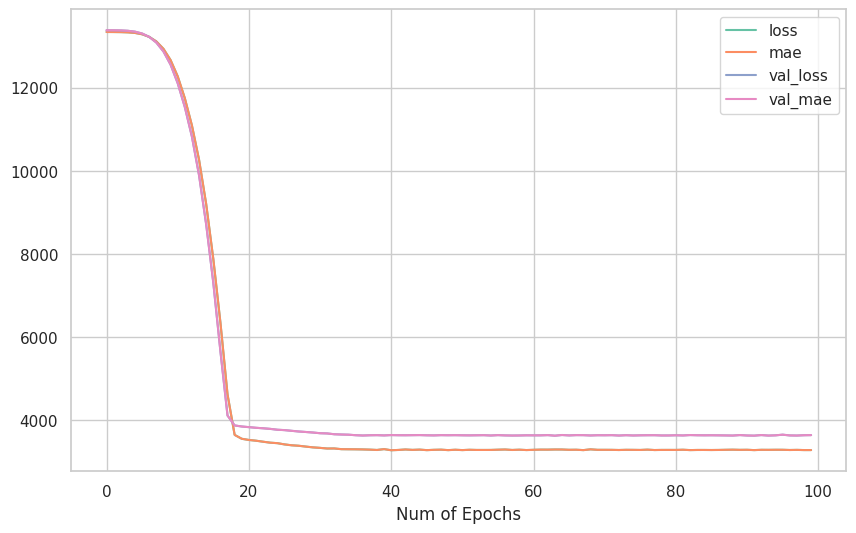

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("Loss of Model")
plt.xlabel("Num of Epochs")

This plot can help the developer of the model to understand the behavior of the training and validation losses over the number of epochs, which can be useful to diagnose overfitting or underfitting issues and to make informed decisions about the architectural choices that need to be made.

In [ ]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'Epoch', 'value': 'Loss'},
    title='Training History')
fig.show()

#### Charges Value

Here the insurance predicted charges value which had analyzing before with ANN model, below:

**Mean**

In [ ]:
data["charges"].mean()

13270.422265141257

**Standard Deviation**

In [ ]:
data["charges"].std()

12110.011236694001

**Loss (error) and MAE**

In [ ]:
insurance_model_loss, insurance_model_mae

(2994.42041015625, 2994.42041015625)

## Predict Result

**fit model** again to ensure train and test data has been validated before get prediction result

In [56]:
insurance_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3821.5522 - mae: 3821.5522 - val_loss: 3369.9119 - val_mae: 3369.9119
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3820.3008 - mae: 3820.3008 - val_loss: 3357.7090 - val_mae: 3357.7090
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3809.6538 - mae: 3809.6538 - val_loss: 3356.0146 - val_mae: 3356.0146
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3806.5947 - mae: 3806.5947 - val_loss: 3353.2664 - val_mae: 3353.2664
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3803.4541 - mae: 3803.4541 - val_loss: 3332.0391 - val_mae: 3332.0391
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3796.2124 - mae: 3796.2124 - val_loss: 3326.9175 - val_mae: 3326.9172
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3793.1165 - mae: 3793.1165 - val_loss: 3319.3335 - val_mae: 3319.3335
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3788.1533 - mae: 3788.1533 - val_loss:

Here's a step-by-step explanation of what happens when you call `insurance_model.predict(X_test)`:
- The model takes in the input data X_test and processes it through the layers of the model.
- The output from each layer is calculated based on the weights and biases learned during the training process.
- The output from the final layer is the predicted value for each sample in the test data.
- The predicted values are returned as a NumPy array, which is stored in the predictions variable.

In [58]:
predictions = insurance_model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


When you call `insurance_model.predict(X_test)`, the model uses the trained weights and biases to generate predictions for each sample in the test data. The output is a NumPy array where each element corresponds to the predicted value for the corresponding sample in the test data.

# Summary
---

In implementation, the choice between ML and DL should be based on the purpose and nature of the data to be processed. **If the data has complex and unstructured patterns, then DL can be a more effective choice**. *However, if the data has simple and structured patterns, then ML can be a more effective choice*.

In analyzing the performance of models built to predict the value of health insurance costs using Machine Learning (ML) and Deep Learning (DL) approaches, the results show that DL has advantages in processing and analyzing complex and unstructured data. DL can predict the value of health insurance costs with more accuracy and precision than ML, especially when the data has complex and unstructured patterns.

However, ML has the advantage of processing and analyzing data that is structured and has simpler patterns. ML can predict the value of health insurance costs more quickly and efficiently than DL, especially when the data has simpler and more structured patterns.

## Conclusion

The results of the comparison of several Machine Learning models used, it is evident that the Random Forest model is closest to the actual value (actual value) so that the **Random forest** model can be said to be suitable for use.

And for Deep Learning models recommended to using **ANN with Backpropagation** to get minimum gradient loss beside iteration and epoch along training & testing.